In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
#import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.stats import binned_statistic_2d

In [4]:


file = "./Daten/se_atlantic_df.csv"
df = pd.read_csv(file, index_col='time')
df

,lat,lon,clf,lwp,blh,cape,mlspf,mslhf,msshf,q700,...,u850,v10,v700,v850,w700,w850,Terra_descending,lsm,eis,lnNd
time,,,,,,,,,,,,,,,,,,,,,
2011-01-02,-22.5,0.5,0.4090,42.0,1093.81670,0.0625,0.000000,-155.369140,-6.973602,0.000428,...,-8.787602,2.639738,4.218988,2.997350,0.116207,0.090684,10.0,0.0,7.388361,4.303515
2011-01-02,-22.5,1.5,0.4736,84.0,1120.74900,0.0625,0.000000,-161.144440,-4.884033,0.000448,...,-8.541816,3.013847,5.087822,2.838166,0.094163,0.134979,9.0,0.0,7.360839,4.267550
2011-01-02,-22.5,2.5,0.4375,78.0,1296.67750,23.3750,0.000000,-162.420750,-6.527832,0.000439,...,-8.573027,3.543198,5.399510,3.546535,0.076528,0.126710,9.0,0.0,7.360904,3.890206
2011-01-02,-21.5,0.5,0.7204,45.0,1050.81710,0.0625,0.000000,-168.866090,-6.806457,0.000433,...,-8.861729,3.601732,3.622884,2.680972,0.085346,0.211165,10.0,0.0,7.948625,4.285318
2011-01-02,-21.5,1.5,0.7309,35.0,1167.79440,23.3750,0.000000,-161.686860,-7.586548,0.000445,...,-9.544472,3.466849,4.452756,3.642045,0.075269,0.100724,9.0,0.0,8.222531,4.571185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,-11.5,7.5,0.1795,53.0,781.37620,0.0625,0.000000,-145.062930,-12.490082,0.008177,...,0.049041,4.377944,1.218983,0.434487,0.077158,0.049933,9.0,0.0,1.120656,3.517675
2019-12-31,-11.5,8.5,0.2137,87.0,780.33594,0.0625,0.000000,-135.777800,-10.707001,0.007580,...,2.286486,3.838413,-1.106995,0.305150,0.005358,-0.006764,9.0,0.0,1.344270,4.083280
2019-12-31,-10.5,7.5,0.1584,44.0,824.37573,0.0625,0.014893,-146.594510,-14.468231,0.006371,...,2.485457,4.746963,-1.792710,-0.096790,0.062672,-0.039837,9.0,0.0,1.037748,4.388758


In [5]:
print(df.columns) 
#not sure what each of these columns mean


Index(['lat', 'lon', 'clf', 'lwp', 'blh', 'cape', 'mlspf', 'mslhf', 'msshf',
       'q700', 'q850', 'rh700', 'rh850', 'sst', 't700', 't850', 'tcwv', 'u10',
       'u700', 'u850', 'v10', 'v700', 'v850', 'w700', 'w850',
       'Terra_descending', 'lsm', 'eis', 'lnNd'],
      dtype='object')


Temporal Distribution of clf and lwp

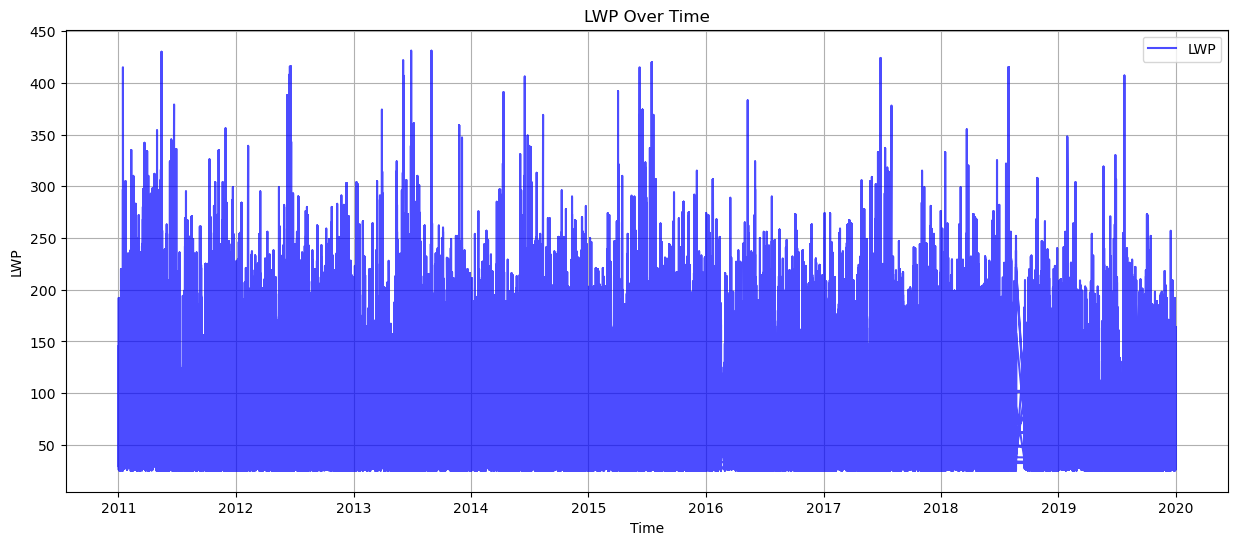

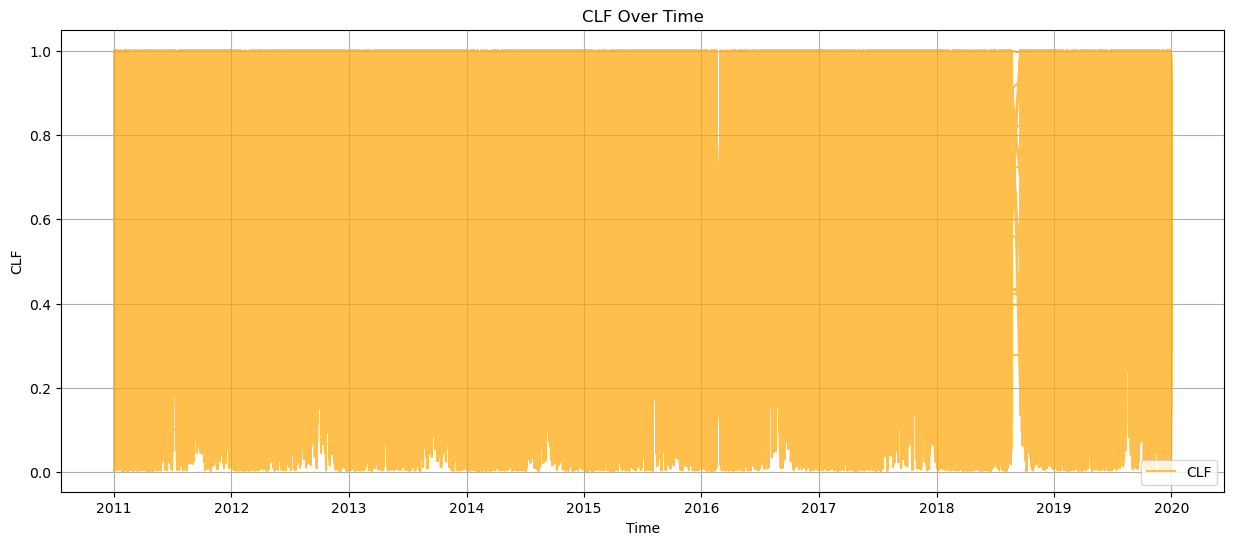

In [6]:
df.index = pd.to_datetime(df.index)

# 1. Time Series Plot for LWP
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['lwp'], label='LWP', color='blue', alpha=0.7)
plt.title('LWP Over Time')
plt.xlabel('Time')
plt.ylabel('LWP')
plt.legend()
plt.grid()
plt.show()

# Time Series Plot for CLF
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['clf'], label='CLF', color='orange', alpha=0.7)
plt.title('CLF Over Time')
plt.xlabel('Time')
plt.ylabel('CLF')
plt.legend()
plt.grid()
plt.show()

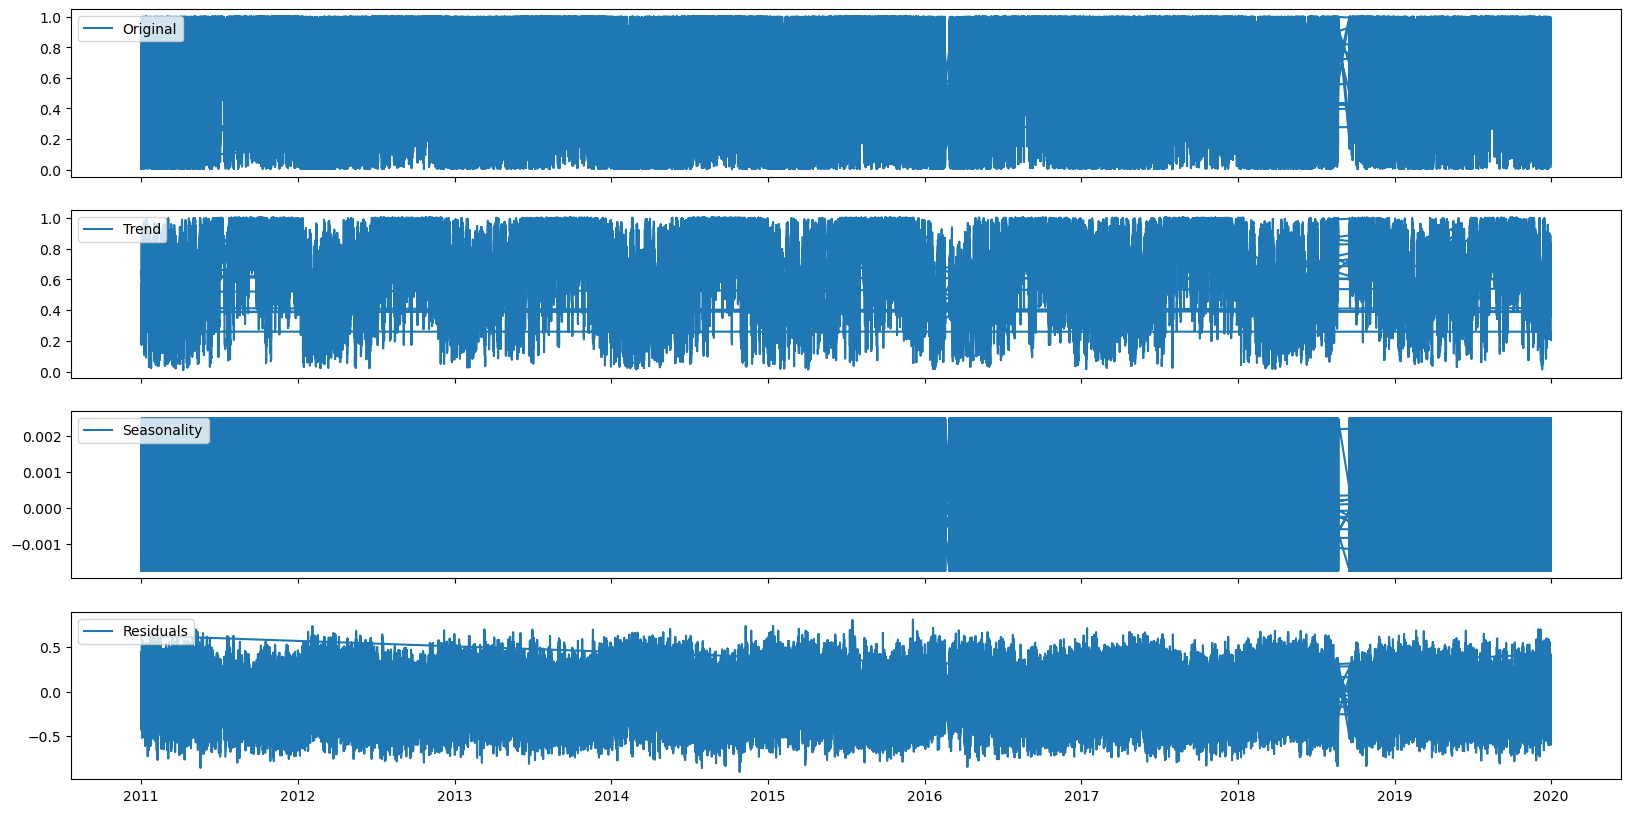

In [7]:
#Time series Decomposition Clf
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomp_clf = seasonal_decompose(df['clf'], model='additive', period=12 ,extrapolate_trend='freq')#period = 12) # we set the cyclic period of the seasonal cycle by hand
trend_estimate = ts_decomp_clf.trend
seasonal_estimate = ts_decomp_clf.seasonal
residual_estimate = ts_decomp_clf.resid

# Plotting the time series and its individual components together
fig, ax = plt.subplots(4, 1, sharex=True, sharey=False)
#fig, ax = plt.subplots(5, 1, sharex=True, sharey=False)

fig.set_figheight(10)
fig.set_figwidth(20)

ax[0].plot(df['clf'], label='Original') 
ax[0].legend(loc='upper left')

ax[1].plot(trend_estimate, label='Trend')
ax[1].legend(loc='upper left')

ax[2].plot(seasonal_estimate, label='Seasonality')
ax[2].legend(loc='upper left')

ax[3].plot(residual_estimate, label='Residuals')
ax[3].legend(loc='upper left')



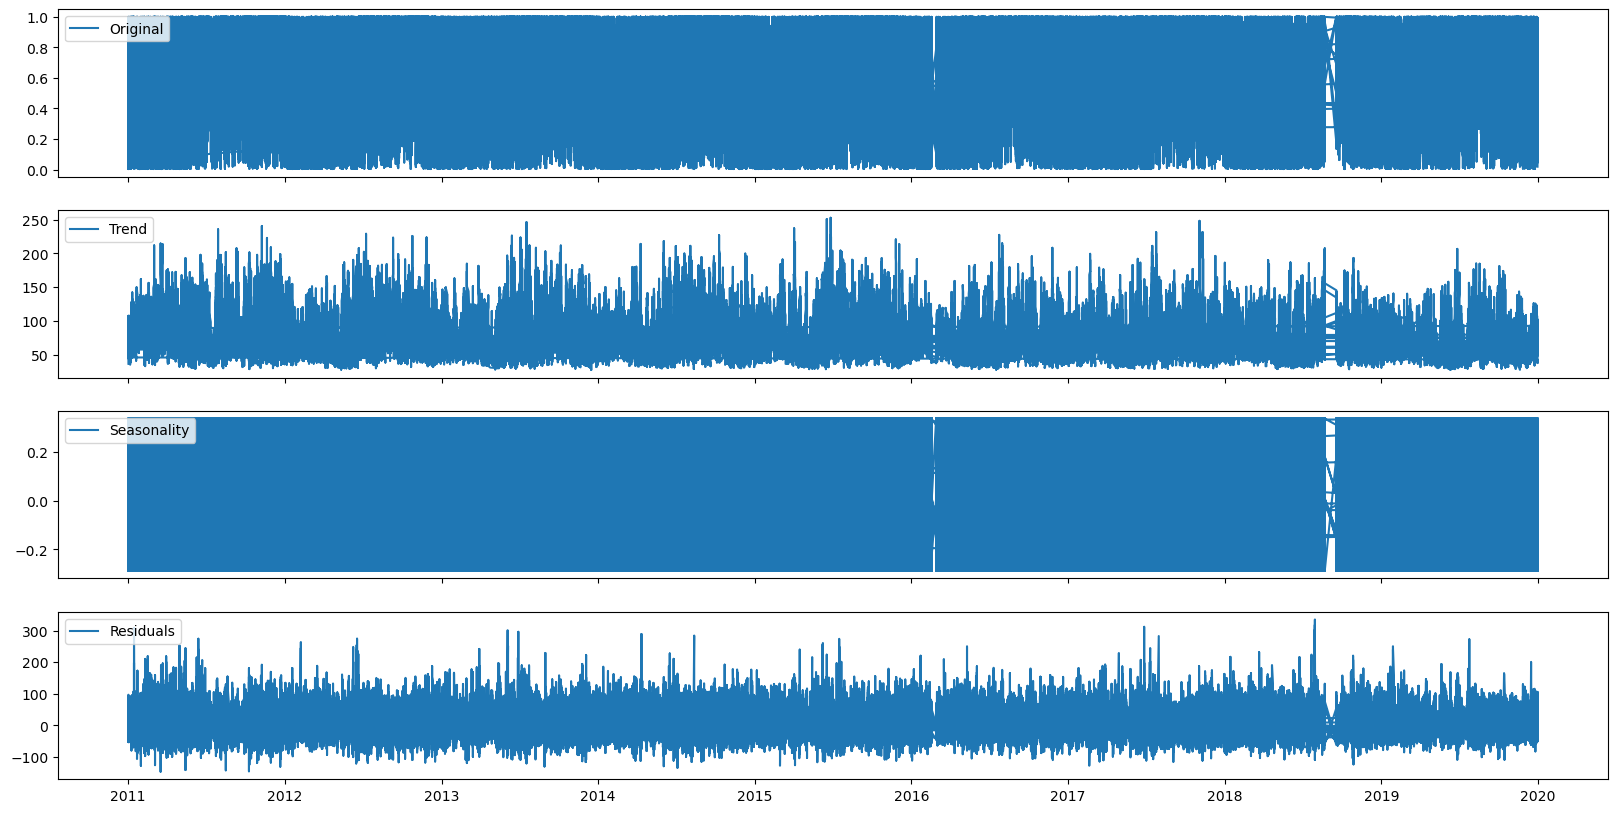

In [8]:
#Time series Decomposition LWP
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decomp_lwp = seasonal_decompose(df['lwp'], model='additive', period=12 ,extrapolate_trend='freq')#period = 12) # we set the cyclic period of the seasonal cycle by hand
trend_estimate = ts_decomp_lwp.trend
seasonal_estimate = ts_decomp_lwp.seasonal
residual_estimate = ts_decomp_lwp.resid

# Plotting the time series and its individual components together
fig, ax = plt.subplots(4, 1, sharex=True, sharey=False)
#fig, ax = plt.subplots(5, 1, sharex=True, sharey=False)

fig.set_figheight(10)
fig.set_figwidth(20)

ax[0].plot(df['clf'], label='Original') 
ax[0].legend(loc='upper left')

ax[1].plot(trend_estimate, label='Trend')
ax[1].legend(loc='upper left')

ax[2].plot(seasonal_estimate, label='Seasonality')
ax[2].legend(loc='upper left')

ax[3].plot(residual_estimate, label='Residuals')
ax[3].legend(loc='upper left')



Spatial Distribution of clf and lwp

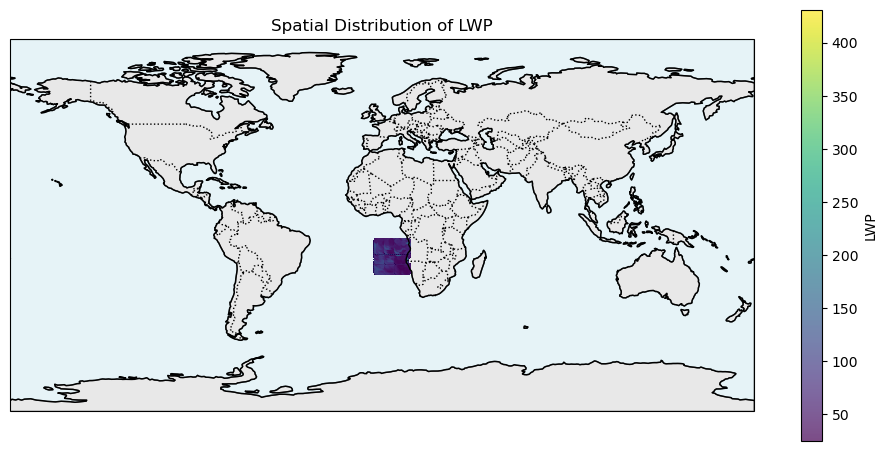

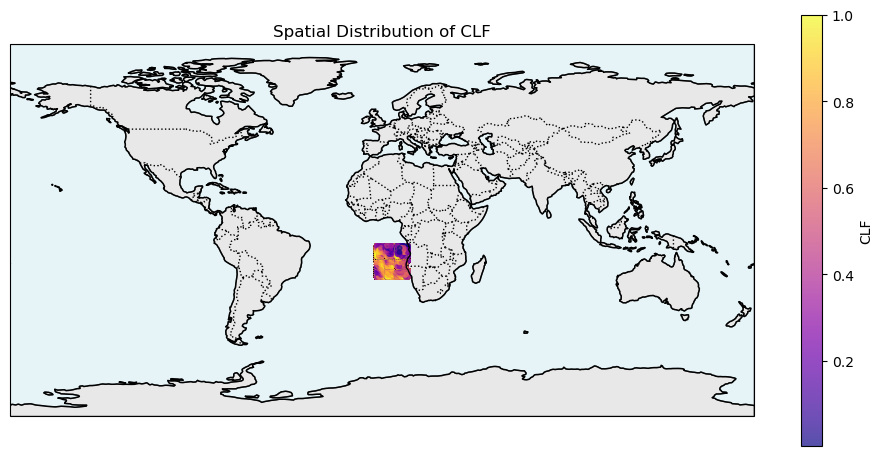

In [18]:
# Helper function for plotting on a map
def plot_on_map(df, column, title, cmap, colorbar_label):
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.5)
    ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue', alpha=0.3)

    # Scatter plot
    scatter = plt.scatter(
        df['lon'], df['lat'], c=df[column], cmap=cmap, s=10, alpha=0.7,
        transform=ccrs.PlateCarree()
    )
    plt.colorbar(scatter, label=colorbar_label, orientation="vertical", shrink=0.7)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Plot for LWP
plot_on_map(df, 'lwp', 'Spatial Distribution of LWP', 'viridis', 'LWP')

# Plot for CLF
plot_on_map(df, 'clf', 'Spatial Distribution of CLF', 'plasma', 'CLF')

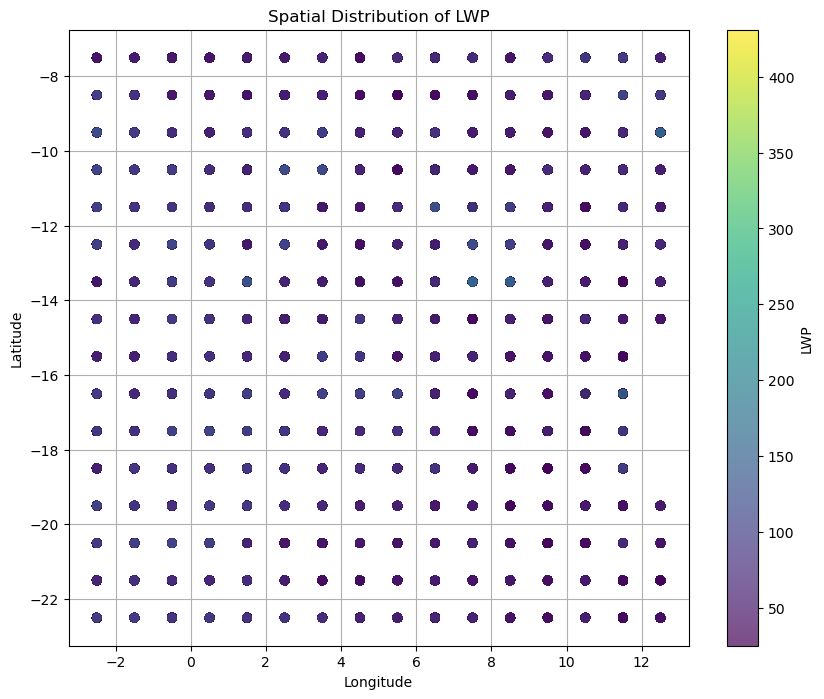

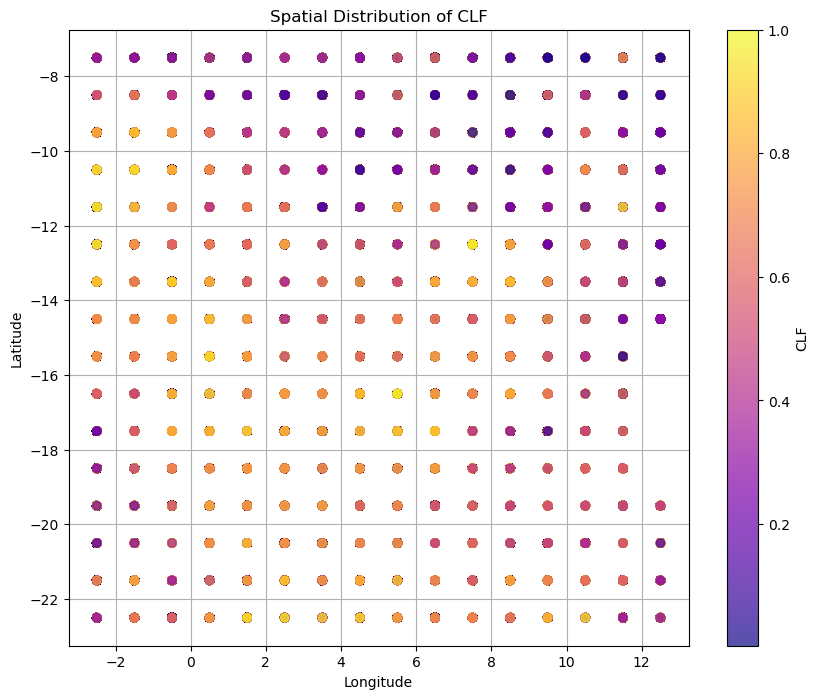

In [9]:
# 2. Spatial Scatter Plot for LWP
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['lon'], df['lat'], c=df['lwp'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='LWP')
plt.title('Spatial Distribution of LWP')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Spatial Scatter Plot for CLF
plt.figure(figsize=(10, 8))
sc = plt.scatter(df['lon'], df['lat'], c=df['clf'], cmap='plasma', alpha=0.7)
plt.colorbar(sc, label='CLF')
plt.title('Spatial Distribution of CLF')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

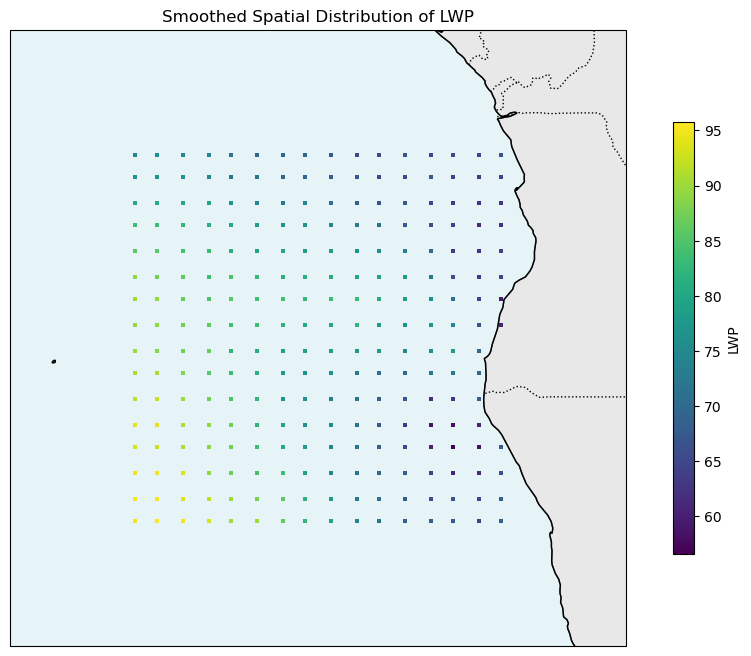

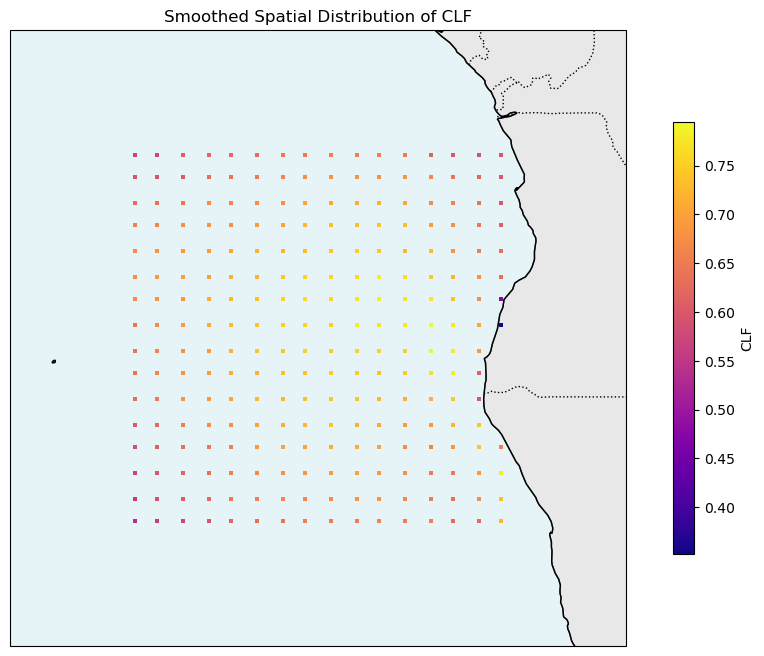

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Function to create a smooth gradient by binning the data
def create_smooth_grid(df, value_col, method='mean', bins=100):
    """
    Interpolates data onto a grid for smoother visualization.
    
    Parameters:
        df: DataFrame containing lat, lon, and the value column.
        value_col: The column to smooth (e.g., 'lwp', 'clf').
        method: Aggregation method ('mean', 'median', etc.).
        bins: Number of bins for latitude and longitude.
    
    Returns:
        lon_edges, lat_edges, grid: Longitude edges, latitude edges, and smoothed grid values.
    """
    lat = df['lat']
    lon = df['lon']
    values = df[value_col]
    
    statistic, lon_edges, lat_edges, _ = binned_statistic_2d(
        lon, lat, values,
        statistic=method, bins=bins
    )
    return lon_edges, lat_edges, statistic

# Function to plot a smooth heatmap on a map
def plot_smooth_map(df, column, title, cmap, colorbar_label, method='mean', bins=100, buffer=5):
    # Create smoothed grid
    lon_edges, lat_edges, grid = create_smooth_grid(df, column, method=method, bins=bins)

    # Calculate bounds with buffer
    bounds = get_bounds_with_buffer(df, buffer=buffer)

    # Plot on a map
    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(bounds, crs=ccrs.PlateCarree())

    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.5)
    ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='lightblue', alpha=0.3)

    # Plot the heatmap
    lon_center = (lon_edges[:-1] + lon_edges[1:]) / 2  # Get bin centers for longitude
    lat_center = (lat_edges[:-1] + lat_edges[1:]) / 2  # Get bin centers for latitude
    mesh = ax.pcolormesh(lon_center, lat_center, grid.T, cmap=cmap, shading='auto', transform=ccrs.PlateCarree())
    
    # Add colorbar
    plt.colorbar(mesh, label=colorbar_label, orientation="vertical", shrink=0.7)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Plot for LWP (smoothed with mean)
plot_smooth_map(df, 'lwp', 'Smoothed Spatial Distribution of LWP', 'viridis', 'LWP', method='mean', bins=100, buffer=5)

# Plot for CLF (smoothed with mean)
plot_smooth_map(df, 'clf', 'Smoothed Spatial Distribution of CLF', 'plasma', 'CLF', method='mean', bins=100, buffer=5)
